In [1]:
from spec_id import Gen_spec
from scipy.interpolate import interp1d, interp2d
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
galDB = pd.read_pickle('../data/upd_galDB.pkl')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [12]:
def Plot_spec(wv,fl,er,mfl,s1,s2,s3):
    ### s1 is row, s2 will determine column, s3 deterimes width
    if s2 == 0:
        plt.subplot(gs[s1,:s3])
    if s2 == 1:
        plt.subplot(gs[s1,s3:])
    plt.errorbar(wv, fl*1E18, er*1E18,linestyle='None', marker='o', markersize=3, color='k')
    plt.plot(wv,mfl*1E18,'r')
    plt.axvline(3934.777,linestyle='--', alpha=.3)
    plt.axvline(3969.588,linestyle='--', alpha=.3)
    plt.axvline(4102.89,linestyle='--', alpha=.3)
    plt.axvline(4305.61,linestyle='--', alpha=.3)
    plt.axvline(4341.68,linestyle='--', alpha=.3)
    plt.axvline(4862.68,linestyle='--', alpha=.3)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    plt.axvspan(4810, 4910, color='k', alpha=.1)
    if max(wv) > 5180:
        plt.axvline(5176.7,linestyle='--', alpha=.3)
        plt.axvspan(5120, 5240, color='k', alpha=.1)


def Plot_dist(Z,PZ,t,Pt,tau,Ptau,z,Pz,d,Pd,s1,s2,s3):
    ### s1 is row, s2 will determine column
    if s2 == 0:
        adj = 0
    if s2 == 1:
        adj = s3
        
    plt.subplot(gs[s1,0 + adj])
    plt.plot(Z,PZ)
    
    plt.subplot(gs[s1,1 + adj])
    plt.plot(t,Pt)
    
    plt.subplot(gs[s1,2 + adj])
    plt.plot(tau,Ptau)
    
    plt.subplot(gs[s1,3 + adj])
    plt.plot(z,Pz)
    
    plt.subplot(gs[s1,4 + adj])
    plt.plot(d,Pd)

In [5]:
sp = Gen_spec(galDB.gids[20],galDB.z_grism[20])
sp.Sim_spec(0.019,2.0,8.0)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

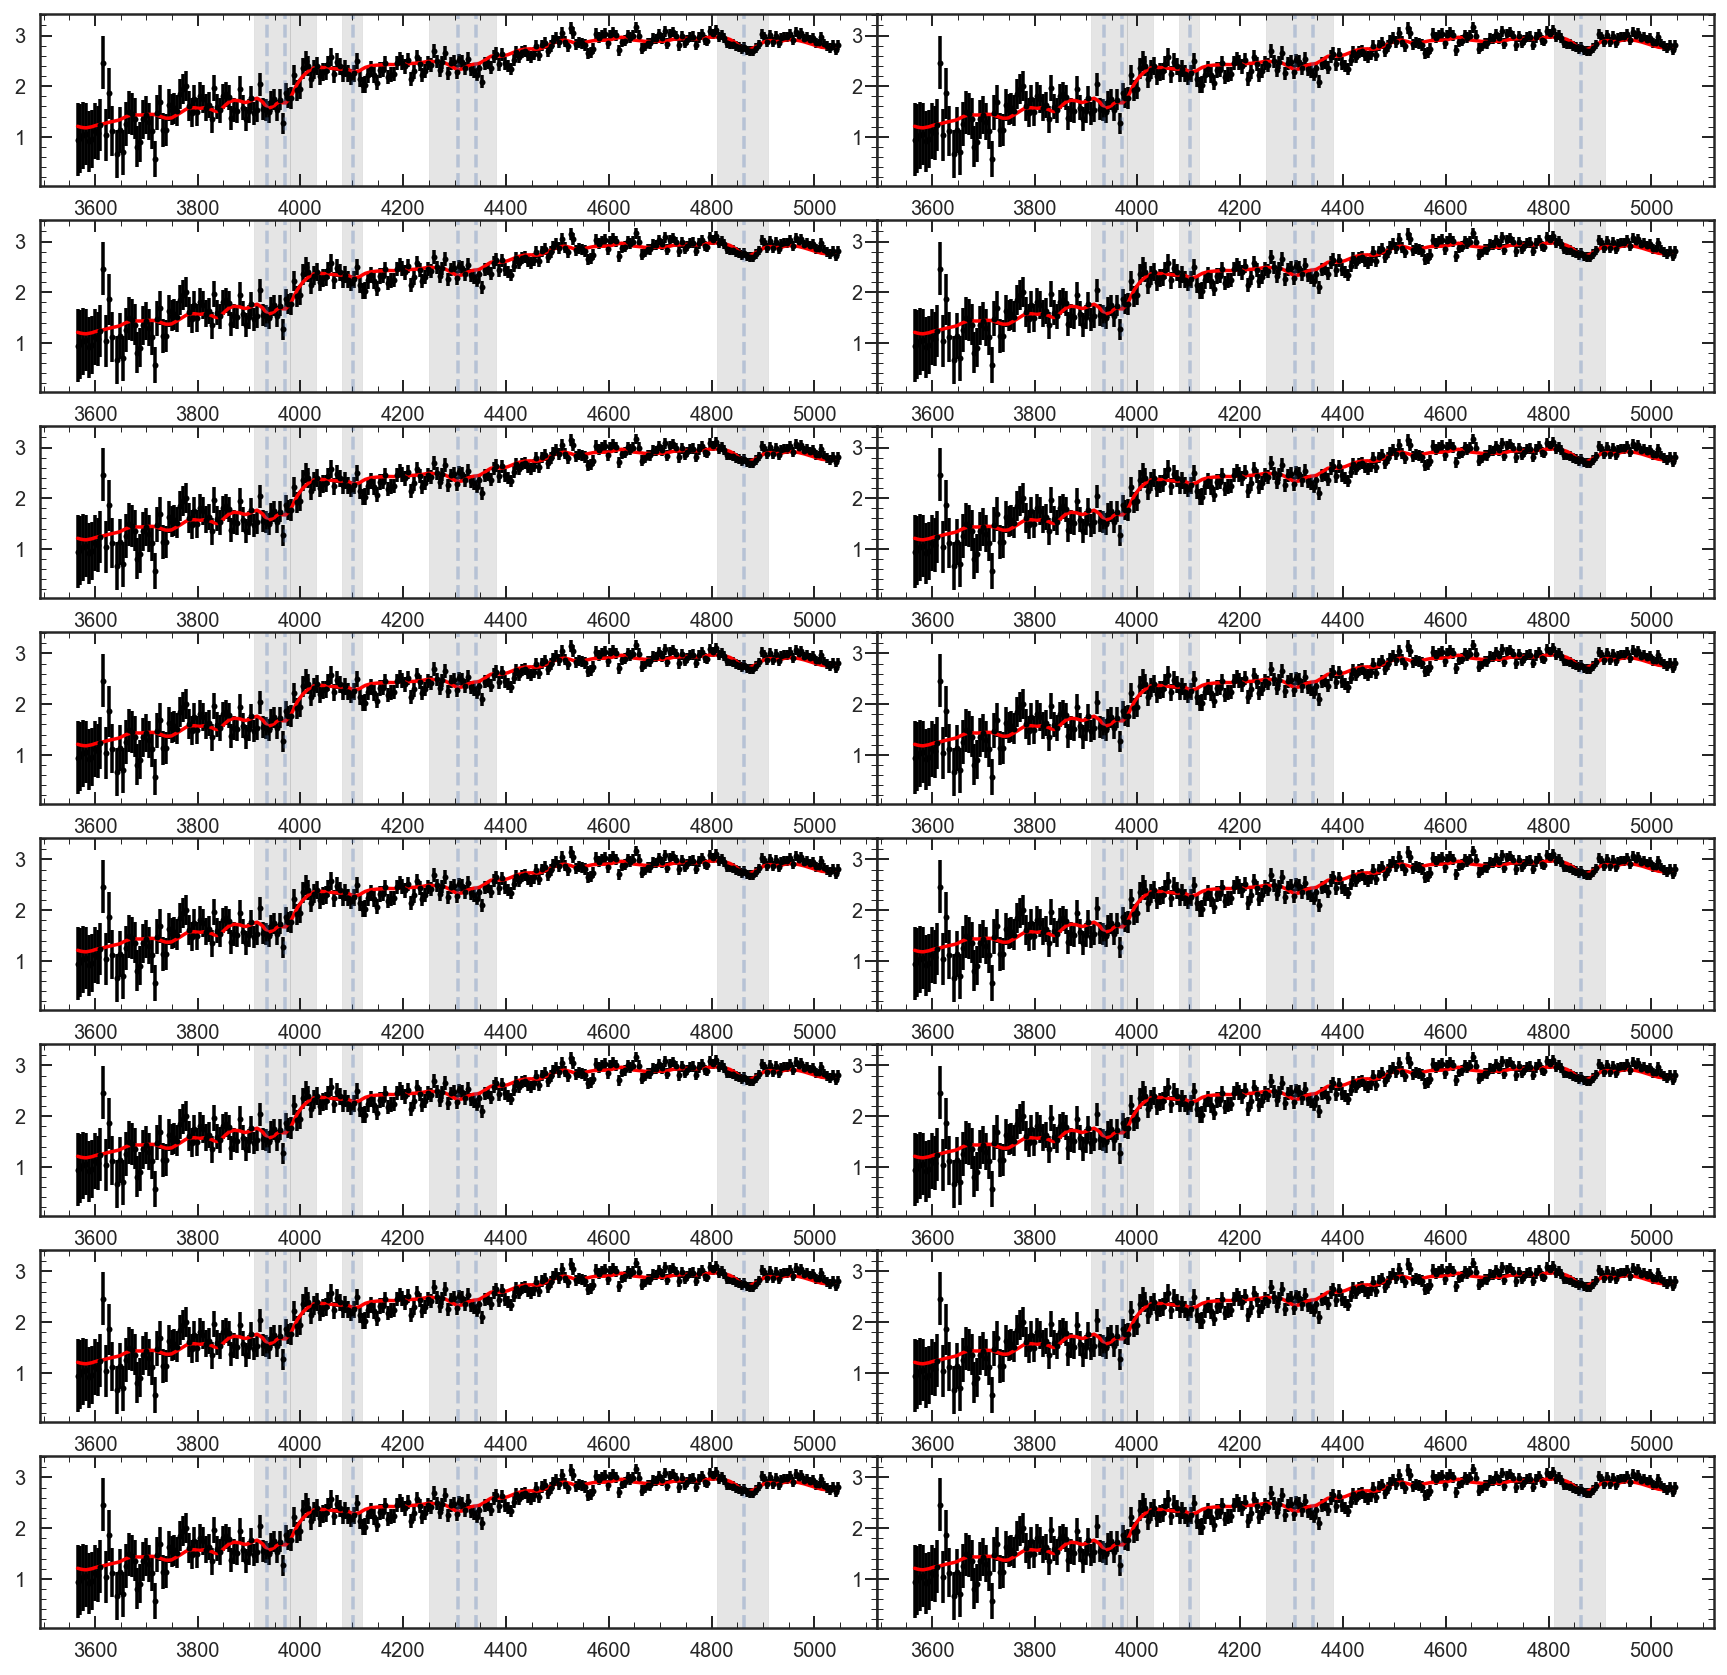

In [13]:
gs = GridSpec(16,2,wspace=0)

plt.figure(figsize=[15,30])

for i in range(2):
    for ii in range(8):
        Plot_spec(sp.gal_wv_rf,sp.gal_fl,sp.gal_er,sp.fl,ii,i,1)
#         Plot_dist(range(10),range(10), range(10),range(10),range(10),range(10),range(10),range(10),range(10),range(10),2*ii+1,i,5)